<a href="https://colab.research.google.com/github/Miketzy/ITBAN3_BSIT3A/blob/main/lab2_Margate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Additional setup for matplotlib and seaborn in Colab
%matplotlib inline
sns.set(style="whitegrid")


In [ ]:


# Mount Google Drive if your file is stored there
from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Assuming 'your_dataset.csv' is the name of your dataset file
file_path = '/content/drive/My Drive/Colab Notebooks/loans.csv'  # Update the path based on your file's location

# Load the dataset into a DataFrame and set 'client_id' as the index
df = pd.read_csv(file_path, index_col='client_id')


In [ ]:
# Display the first few rows of the DataFrame to verify the import
df.head()


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
# Display information about the dataset, including data types
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)


Missing Values:
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


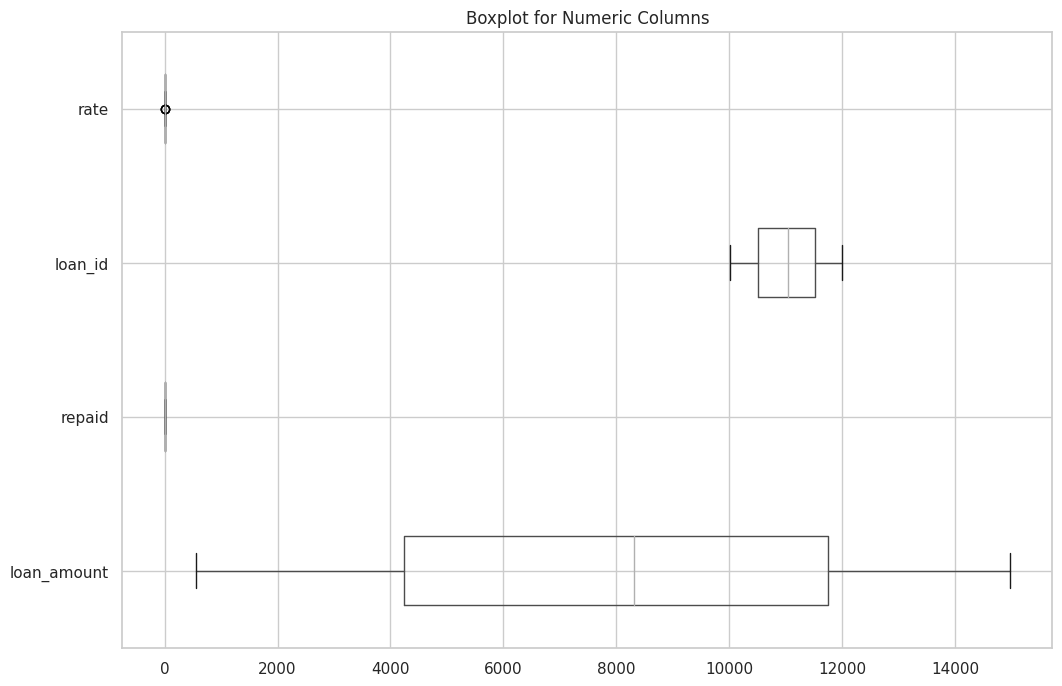

In [ ]:
import matplotlib.pyplot as plt

# Plot boxplots for each numeric column in the dataset
df.boxplot(figsize=(12, 8), vert=False)
plt.title('Boxplot for Numeric Columns')
plt.show()


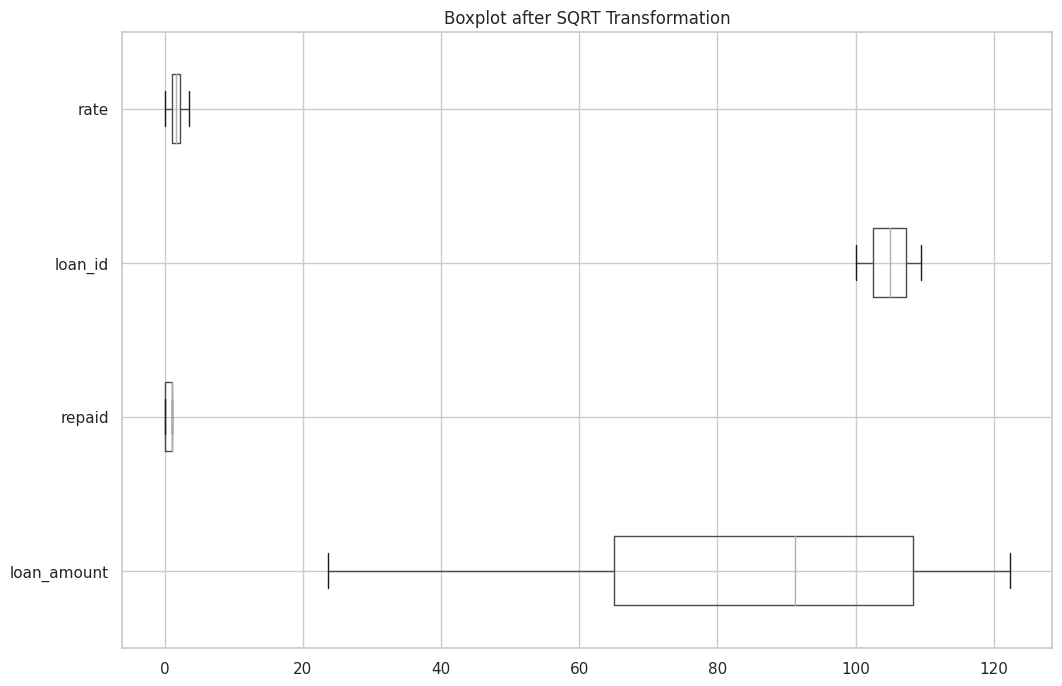

In [ ]:
import numpy as np

# Identify numeric columns with outliers (you may customize this based on your dataset)
numeric_columns = df.select_dtypes(include=np.number).columns

# Apply SQRT transformation to each numeric column with outliers
for col in numeric_columns:
    if df[col].dtype in [np.float64, np.int64]:  # Ensure the column is numeric
        df[col] = np.sqrt(df[col])

# Visualize boxplots after transformation
df.boxplot(figsize=(12, 8), vert=False)
plt.title('Boxplot after SQRT Transformation')
plt.show()


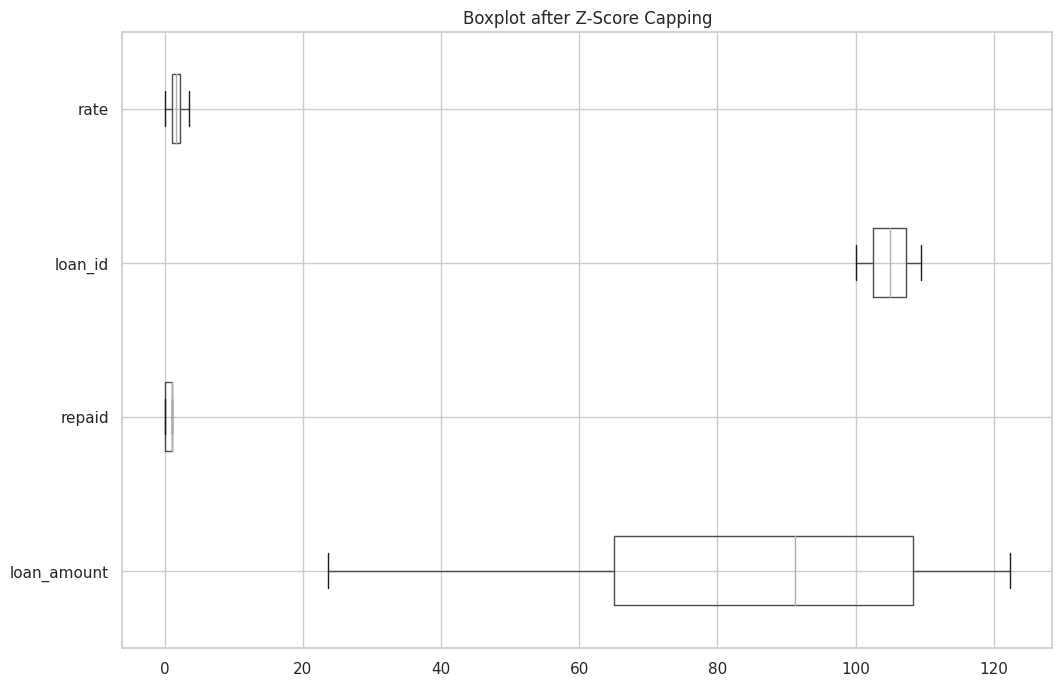

In [ ]:
from scipy.stats import zscore

# Calculate Z-Scores for each numeric column
z_scores = zscore(df[numeric_columns])

# Define a Z-Score threshold (e.g., 3 for a significance level of 99.7%)
z_threshold = 3

# Identify and cap values beyond the threshold
outlier_mask = np.abs(z_scores) > z_threshold
df[numeric_columns] = np.where(outlier_mask, np.sign(z_scores) * z_threshold, df[numeric_columns])

# Visualize boxplots after capping
df.boxplot(figsize=(12, 8), vert=False)
plt.title('Boxplot after Z-Score Capping')
plt.show()


Index(['loan_type', 'loan_amount', 'repaid', 'loan_id', 'loan_start',
       'loan_end', 'rate'],
      dtype='object')
Skewness (after Min-Max Normalization): -0.46483436078235707
Kurtosis (after Min-Max Normalization): -0.8445788695574747


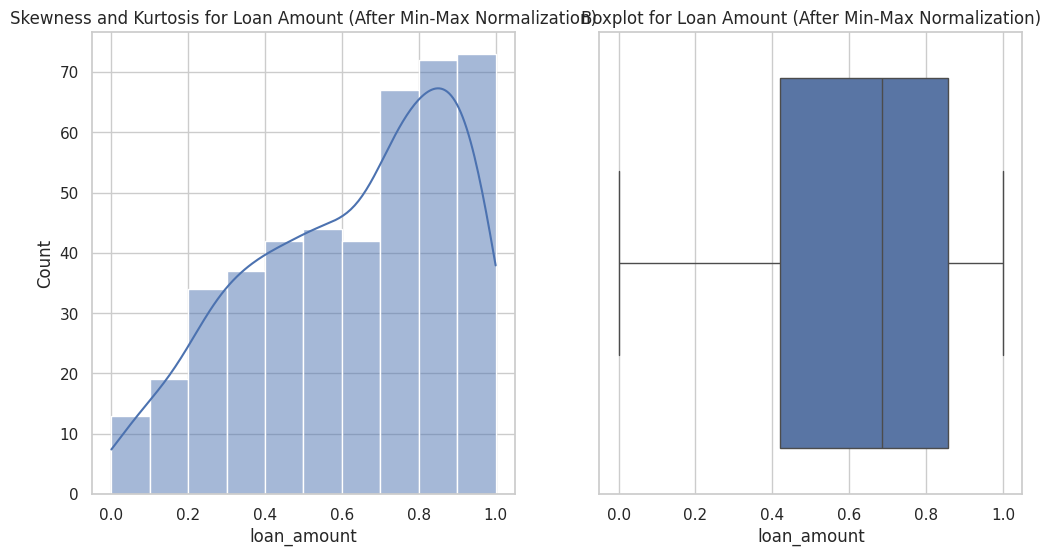

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Assuming you have already loaded your dataset into the DataFrame 'df'
# Display the list of column names in the dataset
print(df.columns)

# Identify numerical columns for Min-Max Normalization
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Normalization to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display skewness and kurtosis for 'loan_amount' after Min-Max Normalization
skewness_loan_amount = skew(df['loan_amount'])
kurtosis_loan_amount = kurtosis(df['loan_amount'])

print(f'Skewness (after Min-Max Normalization): {skewness_loan_amount}')
print(f'Kurtosis (after Min-Max Normalization): {kurtosis_loan_amount}')

# Plot skewness and kurtosis graphs for 'loan_amount'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['loan_amount'], kde=True)
plt.title('Skewness and Kurtosis for Loan Amount (After Min-Max Normalization)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['loan_amount'])
plt.title('Boxplot for Loan Amount (After Min-Max Normalization)')

plt.show()



The code identifies numerical variables in your dataset by examining the data types of each column. MinMaxScaler is then used to apply Min-Max Normalization to these numerical columns, and skewness and kurtosis are computed for the 'loan_amount' column following normalization.
The distribution's asymmetry is measured by skewness. A symmetric distribution is indicated by a skewness value close to 0.
Kurtosis quantifies the distribution's tails and sharpness. A kurtosis rating of three is regarded as typical. Tails with a positive kurtosis are heavier than those with a negative kurtosis.

In [ ]:
import pandas as pd

# Assuming you have already loaded your dataset into the DataFrame 'df'

# Display the list of column names and their data types
print(df.dtypes)

# Identify categorical columns for encoding
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Apply pd.get_dummies to encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first five rows of the encoded DataFrame
print("First five rows after encoding:")
print(df_encoded.head())


loan_type       object
loan_amount    float64
repaid         float64
loan_id        float64
loan_start      object
loan_end        object
rate           float64
dtype: object
First five rows after encoding:
           loan_amount  repaid   loan_id      rate  loan_type_credit  \
client_id                                                              
46109         0.945005     0.0  0.122929  0.395743                 0   
46109         0.763036     0.0  0.503211  0.294872                 1   
46109         0.903650     1.0  0.506237  0.209885                 0   
46109         0.893913     1.0  0.305747  0.293574                 0   
46109         0.961225     1.0  0.718514  0.483475                 1   

           loan_type_home  loan_type_other  loan_start_2000-03-06  \
client_id                                                           
46109                   1                0                      0   
46109                   0                0                      0   
46109       

In [ ]:
import pandas as pd

# Assuming you have already loaded your dataset into the DataFrame 'df'

# Convert 'loan_start' and 'loan_end' columns to datetime format
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

# Create a new column 'loan_tenure' to store the calculated tenure
df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days

# Display the first five rows with the new 'loan_tenure' column
print("First five rows with loan_tenure:")
print(df[['loan_start', 'loan_end', 'loan_tenure']].head())


First five rows with loan_tenure:
          loan_start   loan_end  loan_tenure
client_id                                   
46109     2002-04-16 2003-12-20          613
46109     2003-10-21 2005-07-17          635
46109     2006-02-01 2007-07-05          519
46109     2010-12-08 2013-05-05          879
46109     2010-07-07 2012-05-21          684


In [ ]:
# Display the list of column names in the dataset
print(df.columns)

# Replace 'actual_target_column' with the actual name of your target variable column ('repaid')
X = df.drop(columns=['repaid'])
y = df['repaid']




Index(['loan_type', 'loan_amount', 'repaid', 'loan_id', 'loan_start',
       'loan_end', 'rate', 'loan_tenure'],
      dtype='object')
